In [1]:
%matplotlib inline
%load_ext autoreload
# ! pip install git+https://github.com/avivajpeyi/pspline_psd.git -q

# Example: Wavelet

First, lets generate some data and plot it.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans


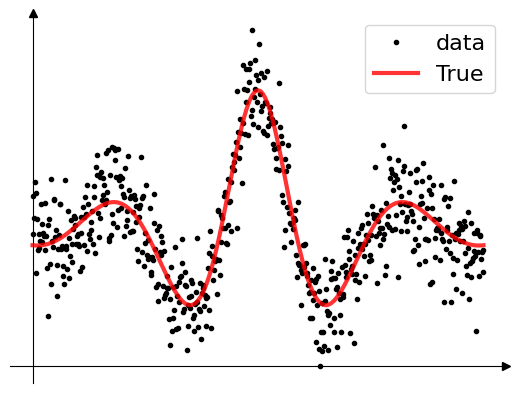

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from slipper.sample.spline_model_sampler import fit_data_with_pspline_model
from slipper.plotting import set_plotting_style
from slipper.plotting.plot_spline_model_and_data import plot_spline_model_and_data
from slipper.plotting.utils import convert_axes_spines_to_arrows


def func(x):
    return 1 / (x ** 2 + 1) * np.cos(np.pi * x)


n_obs = 600
np.random.seed(0)

# make example data
x = np.linspace(-3,3,n_obs)
y = func(x) + np.random.normal(0, 0.2, len(x))
# move data to be positive
scaling = np.abs(min(y))
y = y + scaling

# plot example data
set_plotting_style()
fig, ax = plt.subplots()
ax.plot(y, '.k', label='data')
ax.plot(func(x)+scaling, '-r', label='True', lw=3, alpha=0.8, zorder=10)
convert_axes_spines_to_arrows(ax)
ax.set_xticks([])
ax.set_yticks([])
ax.legend();


In [4]:
mcmc_objs = []
n_basis = [5, 10, 15, 30]
for k in n_basis:
    mcmc_ = fit_data_with_pspline_model(
        data=y, Ntotal=500, burnin=100,
        degree=3, eqSpaced=True, 
         k=k
    )
    mcmc_objs.append(mcmc_)


Optimization terminated successfully.
         Current function value: 102.261546
         Iterations: 663
         Function evaluations: 1191


MCMC sampling:   0%|          | 0/500 [00:00<?, ?it/s]

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Liberation Sans
findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans' not found because none of the following families were found: Liberation Sans
findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans' not found because none of the following families were found: Liberation Sans
findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans' not found because none of the following families were found: Liberation Sans
/Users/avaj0001/Documents/projects/pspline_psd/src/slipper/plotting/plot_spline_model_and_data.py:60: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()

Optimization terminated successfully.
         Current function value: 52.862876
         Iterations: 24853
         Function evaluations: 34723


MCMC sampling:   0%|          | 0/500 [00:00<?, ?it/s]

/Users/avaj0001/Documents/projects/pspline_psd/src/slipper/plotting/plot_spline_model_and_data.py:60: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


Optimization terminated successfully.
         Current function value: 24.860890
         Iterations: 8507
         Function evaluations: 11569


MCMC sampling:   0%|          | 0/500 [00:00<?, ?it/s]

/Users/avaj0001/Documents/projects/pspline_psd/src/slipper/plotting/plot_spline_model_and_data.py:60: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


Optimization terminated successfully.
         Current function value: 27.393890
         Iterations: 37942
         Function evaluations: 46086


MCMC sampling:   0%|          | 0/500 [00:00<?, ?it/s]

/Users/avaj0001/Documents/projects/pspline_psd/src/slipper/plotting/plot_spline_model_and_data.py:60: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans


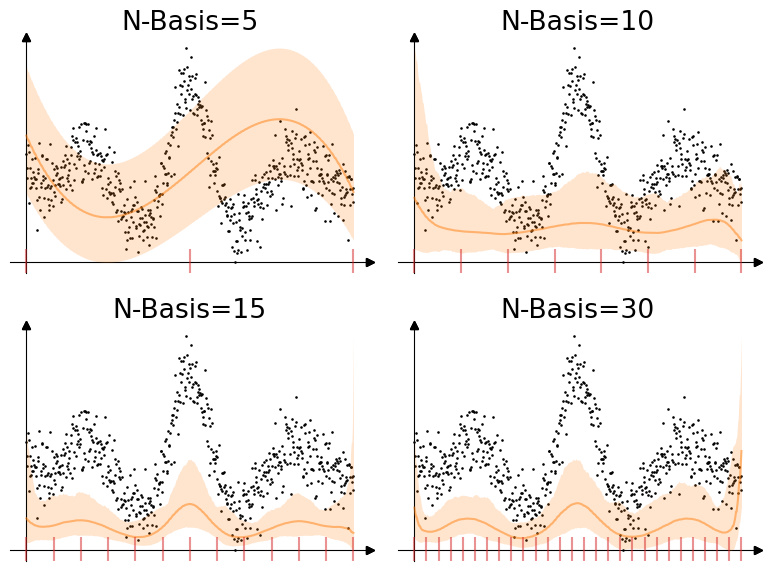

In [5]:
def make_mcmc_plots(mcmc_objs):
    fig, axes = plt.subplots(2,2, figsize=(8,6))
    for i, ax in enumerate(axes.ravel()):
        mc = mcmc_objs[i]
        fig = plot_spline_model_and_data(
            mc.data, mc.psd_quantiles,
            separarte_y_axis=True, knots=mc.knots, ax=ax
        )
        ax.set_title(f'N-Basis={len(mc.basis.T)}')

    fig.tight_layout()
    return fig

fig = make_mcmc_plots(mcmc_objs)

In [6]:
mcmc_objs_non_equal_knots = []
n_basis = [5, 10, 15, 30]
for k in n_basis:
    mcmc_ = fit_data_with_pspline_model(
        data=y, Ntotal=500, burnin=100,
        degree=3, eqSpaced=False,
         k=k
    )
    mcmc_objs_non_equal_knots.append(mcmc_)


Optimization terminated successfully.
         Current function value: 102.259820
         Iterations: 638
         Function evaluations: 1161


MCMC sampling:   0%|          | 0/500 [00:00<?, ?it/s]

/Users/avaj0001/Documents/projects/pspline_psd/src/slipper/plotting/plot_spline_model_and_data.py:60: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


Optimization terminated successfully.
         Current function value: 30.322044
         Iterations: 18088
         Function evaluations: 25278


MCMC sampling:   0%|          | 0/500 [00:00<?, ?it/s]

/Users/avaj0001/Documents/projects/pspline_psd/src/slipper/plotting/plot_spline_model_and_data.py:60: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


Optimization terminated successfully.
         Current function value: 24.406945
         Iterations: 8972
         Function evaluations: 12041


MCMC sampling:   0%|          | 0/500 [00:00<?, ?it/s]

/Users/avaj0001/Documents/projects/pspline_psd/src/slipper/plotting/plot_spline_model_and_data.py:60: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


Optimization terminated successfully.
         Current function value: 25.110331
         Iterations: 62848
         Function evaluations: 75874


MCMC sampling:   0%|          | 0/500 [00:00<?, ?it/s]

/Users/avaj0001/Documents/projects/pspline_psd/src/slipper/plotting/plot_spline_model_and_data.py:60: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


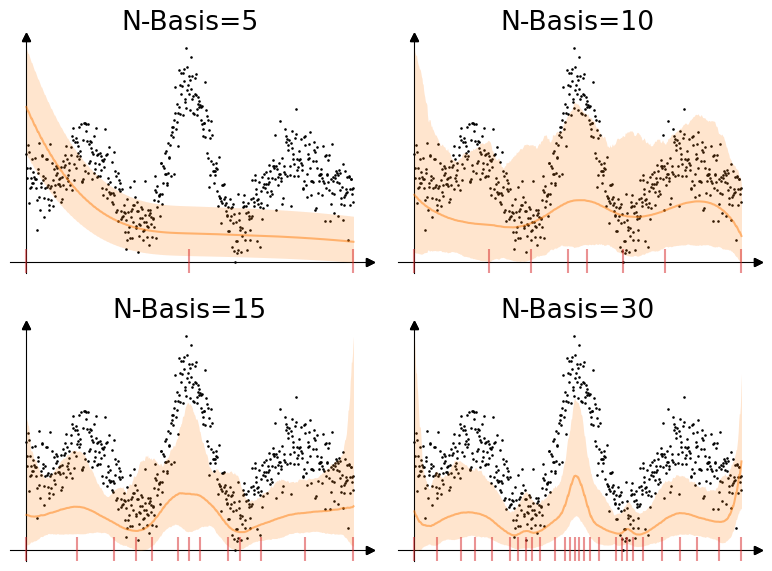

In [7]:
fig = make_mcmc_plots(mcmc_objs_non_equal_knots)